### Unsupervised learning

#### K-means-clustering

This method is used to cluster data points into groups. The number of groups is specified by the user.


#### Mall Customer Segmentation

Mall Customer data is an interesting dataset that has hypothetical customer data.

It puts you in the shoes of the owner of a supermarket.

You have customer data, and on this basis of the data, you have to divide the customers into various groups.

The dataset is from kaggle

In [104]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline

In [105]:
# read in dataset

raw_data = pd.read_csv('./Mall_Customers.csv')

In [106]:
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
raw_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [108]:
raw_data.shape

(200, 5)

In [109]:
raw_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [110]:
# get unique values

raw_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [111]:
# get value counts

raw_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [112]:
# get value count percentages

raw_data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

/home/aceix/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

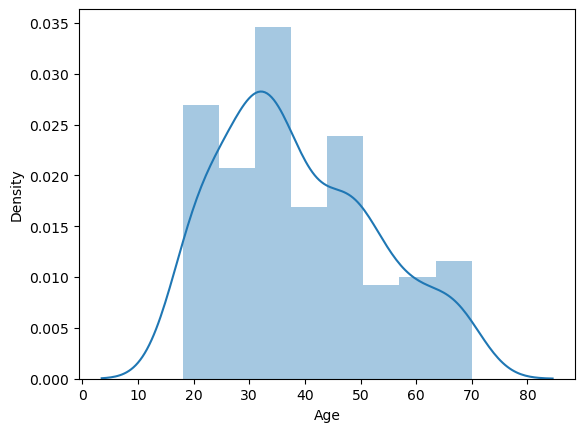

In [113]:
# draw distribution plot of Age

sns.distplot(raw_data['Age'])

/home/aceix/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

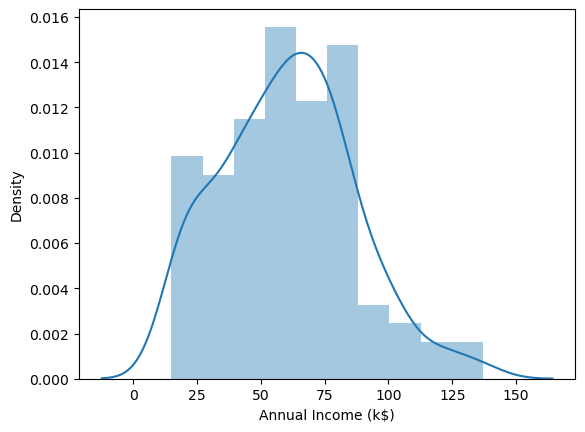

In [114]:
# distplot for annual income

sns.distplot(raw_data['Annual Income (k$)'])

### Clustering based two features

In [115]:
# using annual income and spending score

data = raw_data[['Annual Income (k$)', 'Spending Score (1-100)']]

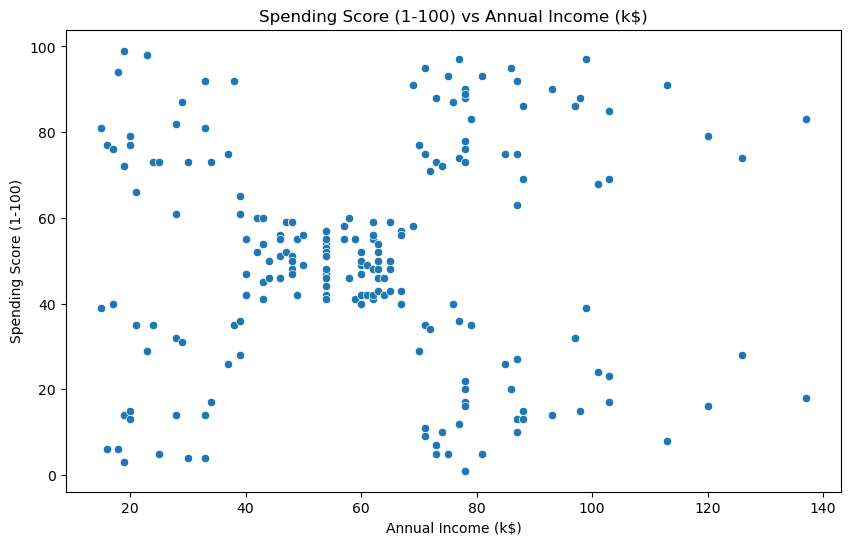

In [116]:
# Scatterplot of the input data

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',  data = data)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [117]:
# form a 2-cluster model

km = KMeans(n_clusters=2)

In [118]:
# train the model

km.fit(data)

KMeans(n_clusters=2)

In [119]:
y = km.predict(data)

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [120]:
# attach the clusters to the data

data['label'] = y

data.head()

/tmp/ipykernel_58697/2046830404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = y


,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


In [121]:
data.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


In [122]:
# view the centroids

centroids = km.cluster_centers_

centroids

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

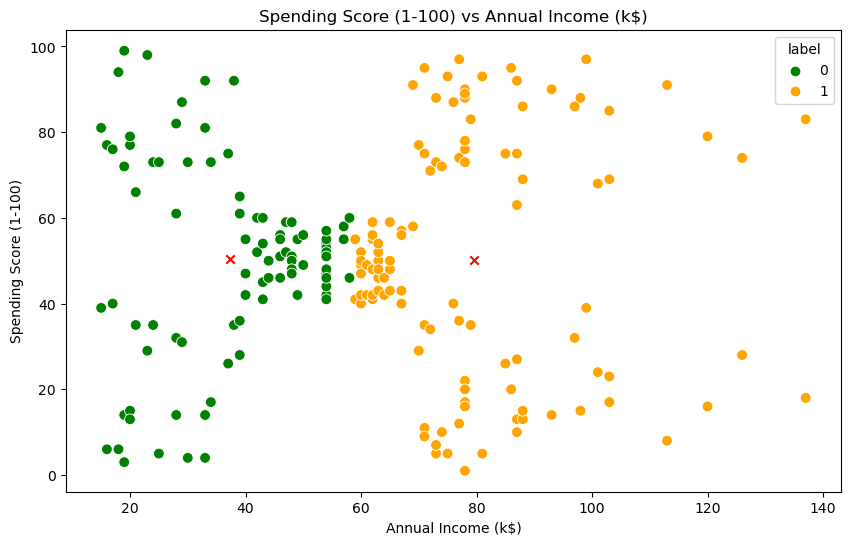

In [123]:
# Scatterplot of the clusters

plt.figure(figsize=(10,6))

# plot centroids
plt.scatter(centroids[0][0], centroids[0][1], color = 'r', marker ='x')
plt.scatter(centroids[1][0], centroids[1][1], color = 'r', marker ='x')

# plot other datapoints
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="label",  
                 palette=['green', 'orange'], legend='full', data=data, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


##### palette=['green','orange','brown','dodgerblue','red']

### Determine the optimal number of clusters using the Elbow Method

In [124]:
# elbow methos
# wcss - Within Cluster Sum of Squared Errors  - It is analogous to the error rate in knn

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit(data)
  wcss.append(km.inertia_)


Text(0, 0.5, 'WCSS')

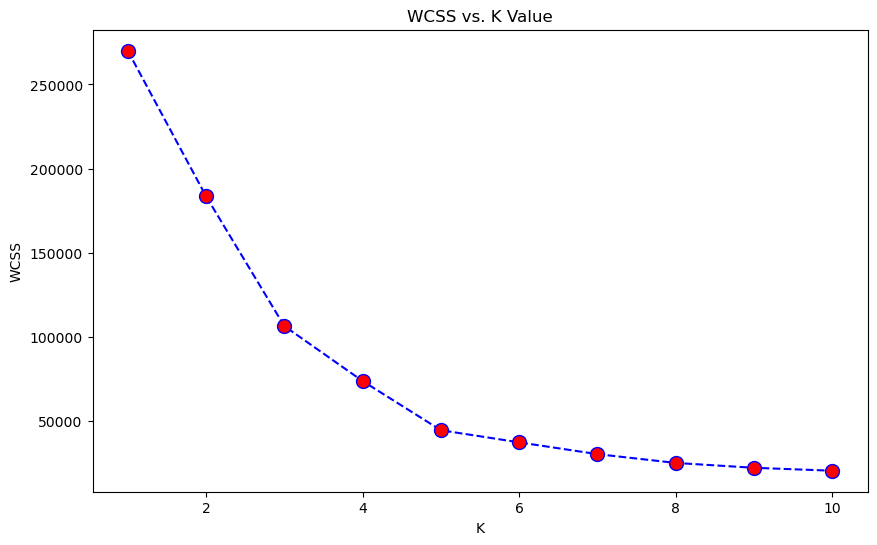

In [125]:
# plot the elbow -- error vs number of clusters

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('WCSS vs. K Value')
plt.xlabel('K')
plt.ylabel('WCSS')


k=5 seems to be the optimal number of clusters; the elbow

In [126]:
# using k = 5

km5 = KMeans(n_clusters=5)

In [127]:
data = raw_data[['Annual Income (k$)', 'Spending Score (1-100)']]

km5.fit(data)

KMeans(n_clusters=5)

In [128]:
y = km5.predict(data)

print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 3 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 3 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [129]:
data['label'] = y

/tmp/ipykernel_58697/2078189796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = y


In [130]:
data

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [131]:
# view the centroids

centroids = km5.cluster_centers_

centroids

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

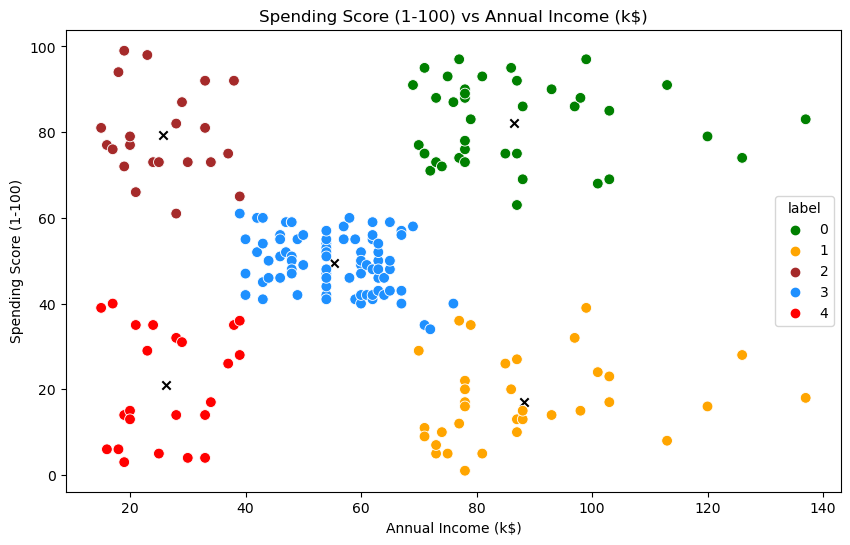

In [132]:
# Scatterplot of the clusters

plt.figure(figsize=(10, 6))

# plot centroids
plt.scatter(centroids[0][0], centroids[0][1], color = 'black', marker ='x')
plt.scatter(centroids[1][0], centroids[1][1], color = 'black', marker ='x')
plt.scatter(centroids[2][0], centroids[2][1], color = 'black', marker ='x')
plt.scatter(centroids[3][0], centroids[3][1], color = 'black', marker ='x')
plt.scatter(centroids[4][0], centroids[4][1], color = 'black', marker ='x')

# plot other datapoints
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full', data=data, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [133]:
# predict the cluster for a new person with annual income of 100k and spending score of 30

km5.predict([[100, 30]])

/home/aceix/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)